In [1]:
import requests
import re 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get the data!
email = "rasbands@byu.edu"
ua = f"STAT386-class-scraper/1.0 (+{email})"

url = "https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic"
r = requests.get(url, headers={"User-Agent": ua, "From": email}, timeout=15)
r.raise_for_status()

tables = pd.read_html(r.text)

# Inspect to see which table index corresponds to which year
# print(len(tables))
# print(tables[0].head())  # check first few rows

years = [2024, 2023, 2022, 2021, 2020]
all_airports = []

for i, year in enumerate(years):
    df = tables[i].copy()
    df["Year"] = year
    all_airports.append(df)

data = pd.concat(all_airports, ignore_index=True)
data.head(60) #checking to make sure it got the next table

/var/folders/2n/z5c1xg815rnc8_7vb9lnwrj40000gn/T/ipykernel_32468/3124384184.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


,Rank,Airport,Location,Country,Code (IATA/ICAO),Total passengers,Rank change,% change,Year
0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,"108,067,766[4]",NaN,03.3%,2024
1,2.0,Dubai International Airport,"Garhoud, Dubai, Dubai",United Arab Emirates,DXB/OMDB,"092,300,000[5]",NaN,06.2%,2024
2,3.0,Dallas Fort Worth International Airport,"Dallas–Fort Worth, Texas",United States,DFW/KDFW,"087,817,864[6]",NaN,07.4%,2024
3,4.0,Tokyo Haneda Airport,"Ōta, Tokyo",Japan,HND/RJTT,"085,000,000[7]",1.0,08.0%,2024
4,5.0,Heathrow Airport,"Hillingdon, London",United Kingdom,LHR/EGLL,"083,882,140[8]",1.0,05.9%,2024
5,6.0,Denver International Airport,"Denver, Colorado",United States,DEN/KDEN,"082,358,744[9]",NaN,05.8%,2024
6,7.0,Istanbul Airport,"Arnavutköy, Istanbul",Turkey,IST/LTFM,"080,430,740[10]",NaN,03.9%,2024
7,8.0,O'Hare International Airport,"Chicago, Illinois",United States,ORD/KORD,"080,043,050[11]",1.0,08.6%,2024
8,9.0,Indira Gandhi International Airport,"Palam, Delhi",India,DEL/VIDP,"077,820,834[12]",1.0,07.8%,2024
9,10.0,Shanghai Pudong International Airport,"Pudong, Shanghai",China,PVG/ZSPD,"076,787,039[13]",11.0,41.0%,2024


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              250 non-null    float64
 1   Airport           250 non-null    object 
 2   Location          250 non-null    object 
 3   Country           250 non-null    object 
 4   Code (IATA/ICAO)  250 non-null    object 
 5   Total passengers  250 non-null    object 
 6   Rank change       234 non-null    object 
 7   % change          250 non-null    object 
 8   Year              250 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 17.7+ KB


In [4]:
# print(len(tables)) 

for i, table in enumerate(tables):
    print(f"--- Table {i} ---")
    print(table.head())


--- Table 0 ---
   Rank                                           Airport  \
0   1.0  Hartsfield–Jackson Atlanta International Airport   
1   2.0                       Dubai International Airport   
2   3.0           Dallas Fort Worth International Airport   
3   4.0                              Tokyo Haneda Airport   
4   5.0                                  Heathrow Airport   

                   Location               Country Code (IATA/ICAO)  \
0          Atlanta, Georgia         United States         ATL/KATL   
1     Garhoud, Dubai, Dubai  United Arab Emirates         DXB/OMDB   
2  Dallas–Fort Worth, Texas         United States         DFW/KDFW   
3                Ōta, Tokyo                 Japan         HND/RJTT   
4        Hillingdon, London        United Kingdom         LHR/EGLL   

  Total passengers  Rank change % change  
0   108,067,766[4]          NaN    03.3%  
1   092,300,000[5]          NaN    06.2%  
2   087,817,864[6]          NaN    07.4%  
3   085,000,000[7]      

In [5]:

# clean the columns if there are extra spaces or lines just incase
data.columns = [c.strip().replace("\n", " ") for c in data.columns]

# change column names 
data.columns = [
    "Rank", "Airport", "Location", "Country", "Code", 
    "TotalPassengers", "RankChange", "PercentChange", "Year"
]


# make the passengers column numeric (it is string)
data["TotalPassengers"] = (
    data["TotalPassengers"]
    .astype(str)
    .str.replace(",", "", regex=True) # remove commas
    .str.extract(r"(\d+\.?\d*)")[0] # get only numbers 
    .astype(float)
)

# convert % change to numeric
data["Percent change numeric"] = (
    data["PercentChange"]
    .astype(str)
    .str.extract(r'([-+]?\d+\.?\d*)')     # extract numeric part
    [0]
    .astype(float)
)

data.head(60) 

,Rank,Airport,Location,Country,Code,TotalPassengers,RankChange,PercentChange,Year,Percent change numeric
0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,108067766.0,NaN,03.3%,2024,3.3
1,2.0,Dubai International Airport,"Garhoud, Dubai, Dubai",United Arab Emirates,DXB/OMDB,92300000.0,NaN,06.2%,2024,6.2
2,3.0,Dallas Fort Worth International Airport,"Dallas–Fort Worth, Texas",United States,DFW/KDFW,87817864.0,NaN,07.4%,2024,7.4
3,4.0,Tokyo Haneda Airport,"Ōta, Tokyo",Japan,HND/RJTT,85000000.0,1.0,08.0%,2024,8.0
4,5.0,Heathrow Airport,"Hillingdon, London",United Kingdom,LHR/EGLL,83882140.0,1.0,05.9%,2024,5.9
5,6.0,Denver International Airport,"Denver, Colorado",United States,DEN/KDEN,82358744.0,NaN,05.8%,2024,5.8
6,7.0,Istanbul Airport,"Arnavutköy, Istanbul",Turkey,IST/LTFM,80430740.0,NaN,03.9%,2024,3.9
7,8.0,O'Hare International Airport,"Chicago, Illinois",United States,ORD/KORD,80043050.0,1.0,08.6%,2024,8.6
8,9.0,Indira Gandhi International Airport,"Palam, Delhi",India,DEL/VIDP,77820834.0,1.0,07.8%,2024,7.8
9,10.0,Shanghai Pudong International Airport,"Pudong, Shanghai",China,PVG/ZSPD,76787039.0,11.0,41.0%,2024,41.0


In [6]:
# quick check to make sure I got the 4 different tables for each year... (it wasn't working at first)
total_by_year = data.groupby('Year')['TotalPassengers'].sum().reset_index()

print(total_by_year)

   Year  TotalPassengers
0  2020     1.233309e+09
1  2021     1.652782e+09
2  2022     2.221414e+09
3  2023     2.819399e+09
4  2024     3.102655e+09


In [7]:
# get rid of old percent change column 
airports = data.drop(columns=["PercentChange"])
print(airports.columns)


Index(['Rank', 'Airport', 'Location', 'Country', 'Code', 'TotalPassengers',
       'RankChange', 'Year', 'Percent change numeric'],
      dtype='object')


In [8]:
# the percent change has a green arrow or a red arrow meaning it went up or down...
# the arrow didn't come through when I scraped it so we have to do this:
# there are only a few so just looked on the wikipedia site

# make sure we start from the numeric version
airports["PercentChangeSigned"] = airports["Percent change numeric"].copy()

# list of (airport name, year) pairs that should be negative
negatives = [
    # 2024
    ("Orlando International Airport", 2024),
    ("Newark Liberty International Airport", 2024),
    ("Mexico City International Airport", 2024),

    # 2021
    ("Guangzhou Baiyun International Airport", 2021),
    ("Chengdu Shuangliu International Airport", 2021),
    ("Shenzhen Bao'an International Airport", 2021),
    ("Beijing Capital International Airport", 2021),
    ("Kunming Changshui International Airport", 2021),
    ("Xi'an Xianyang International Airport", 2021),
    ("Hangzhou Xiaoshan International Airport", 2021),
    ("Tokyo Haneda Airport", 2021)
]

# apply negative sign to those rows
for airport, year in negatives:
    mask = (airports["Airport"].str.contains(airport, case=False, na=False)) & (airports["Year"] == year)
    airports.loc[mask, "PercentChangeSigned"] *= -1

# make ALL 2020 rows negative (since COVID dropped travel everywhere and they are all red arrows)
airports.loc[airports["Year"] == 2020, "PercentChangeSigned"] *= -1

# quick check
airports.loc[airports["PercentChangeSigned"] < 0, ["Airport", "Year", "PercentChangeSigned"]]
#looks good! the data is now all clean!


,Airport,Year,PercentChangeSigned
24,Orlando International Airport,2024,-0.9
40,Newark Liberty International Airport,2024,-0.5
49,Mexico City International Airport,2024,-6.2
157,Guangzhou Baiyun International Airport,2021,-8.0
158,Chengdu Shuangliu International Airport,2021,-1.5
...,...,...,...
245,Guiyang Longdongbao International Airport,2020,-24.3
246,Haikou Meilan International Airport,2020,-31.9
247,Fort Lauderdale–Hollywood International Airport,2020,-55.1
248,Noi Bai International Airport,2020,-43.8


In [9]:
# Save the cleaned dataset
airports.to_csv("clean_airports.csv", index=False)


In [10]:
print(airports.describe())

             Rank  TotalPassengers         Year  Percent change numeric  \
count  250.000000     2.500000e+02   250.000000              250.000000   
mean    25.500000     4.411823e+07  2022.000000               56.606000   
std     14.459818     1.891265e+07     1.417051               84.581788   
min      1.000000     1.642780e+07  2020.000000                0.200000   
25%     13.000000     2.922704e+07  2021.000000               14.425000   
50%     25.500000     4.213171e+07  2022.000000               32.400000   
75%     38.000000     5.488171e+07  2023.000000               70.675000   
max     50.000000     1.080678e+08  2024.000000              954.800000   

       PercentChangeSigned  
count           250.000000  
mean             35.699600  
std              95.349918  
min             -74.500000  
25%               1.925000  
50%              17.600000  
75%              59.875000  
max             954.800000  


In [11]:
print(airports["Year"].value_counts())

Year
2024    50
2023    50
2022    50
2021    50
2020    50
Name: count, dtype: int64


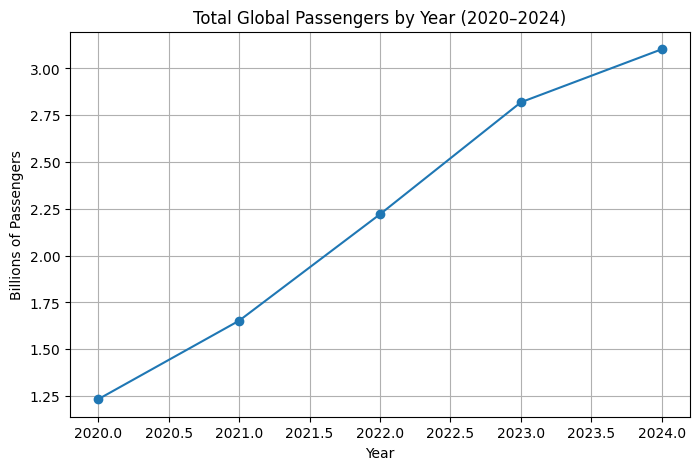

In [12]:
# total global passengers by year ... group by year ... increases a lot since 2020
yearly_totals = airports.groupby("Year", as_index=False)["TotalPassengers"].sum()

plt.figure(figsize=(8,5))
plt.plot(yearly_totals["Year"], yearly_totals["TotalPassengers"]/1e9, marker="o")
plt.title("Total Global Passengers by Year (2020–2024)")
plt.ylabel("Billions of Passengers")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [ ]:
# Which countries and airports consistently handle the most passengers from 2021–2024?
# which countries and aiports have recovered the best since the COVID-19 pandemic?

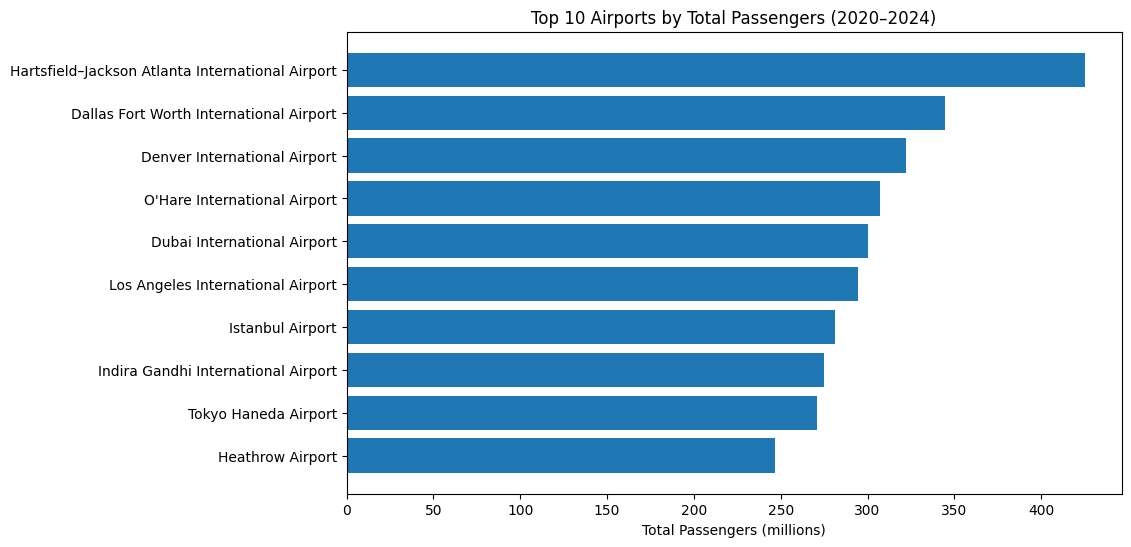

In [13]:
# look at top 10 airports overall
top_airports = (
    airports.groupby("Airport", as_index=False)["TotalPassengers"]
    .sum()
    .sort_values("TotalPassengers", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
plt.barh(top_airports["Airport"], top_airports["TotalPassengers"]/1e6)
plt.title("Top 10 Airports by Total Passengers (2020–2024)")
plt.xlabel("Total Passengers (millions)")
plt.gca().invert_yaxis()
plt.show()

In [14]:
# table of top 10 airports with some aggregations
airport_summary = (
    airports.groupby("Airport")
    .agg(
        avg_passengers=("TotalPassengers", "mean"),
        total_passengers=("TotalPassengers", "sum"),
        years_in_top50=("Year", "nunique"),
        country=("Country", "first")
    )
    .sort_values(by="avg_passengers", ascending=False)
    .head(10)
)

airport_summary


,avg_passengers,total_passengers,years_in_top50,country
Airport,,,,
Hartsfield–Jackson Atlanta International Airport,85008858.40,425044292.0,5,United States
Dallas Fort Worth International Airport,68953418.80,344767094.0,5,United States
Denver International Airport,64410560.60,322052803.0,5,United States
Seoul Incheon International Airport,63452329.00,126904658.0,2,South Korea
Heathrow Airport,61697870.25,246791481.0,4,United Kingdom
O'Hare International Airport,61431709.00,307158545.0,5,United States
Dubai International Airport,60062345.20,300311726.0,5,United Arab Emirates
Los Angeles International Airport,58869992.80,294349964.0,5,United States
Istanbul Airport,56213228.40,281066142.0,5,Turkey


In [15]:
# just look at seoul bc only appeared 2x

airports[airports["Airport"] == "Seoul Incheon International Airport"]



,Rank,Airport,Location,Country,Code,TotalPassengers,RankChange,Year,Percent change numeric,PercentChangeSigned
12,13.0,Seoul Incheon International Airport,"Jung District, Incheon",South Korea,ICN/RKSI,70669246.0,7.0,2024,26.7,26.7
69,20.0,Seoul Incheon International Airport,Incheon,South Korea,ICN/RKSI,56235412.0,?,2023,213.8,213.8


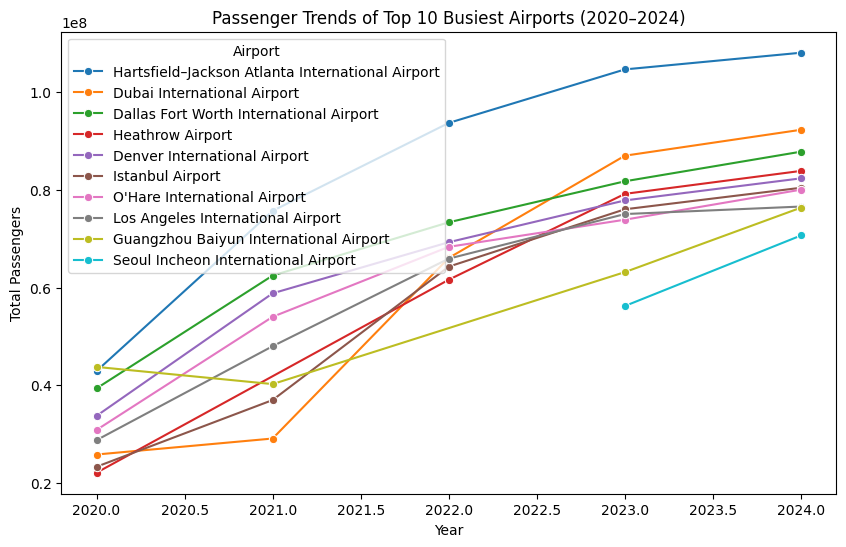

In [16]:
# graph of the top airports over time 
top_airports = airports[airports["Airport"].isin(airport_summary.index)]

plt.figure(figsize=(10,6))
sns.lineplot(data=top_airports, x="Year", y="TotalPassengers", hue="Airport", marker="o")
plt.title("Passenger Trends of Top 10 Busiest Airports (2020–2024)")
plt.ylabel("Total Passengers")
plt.show()


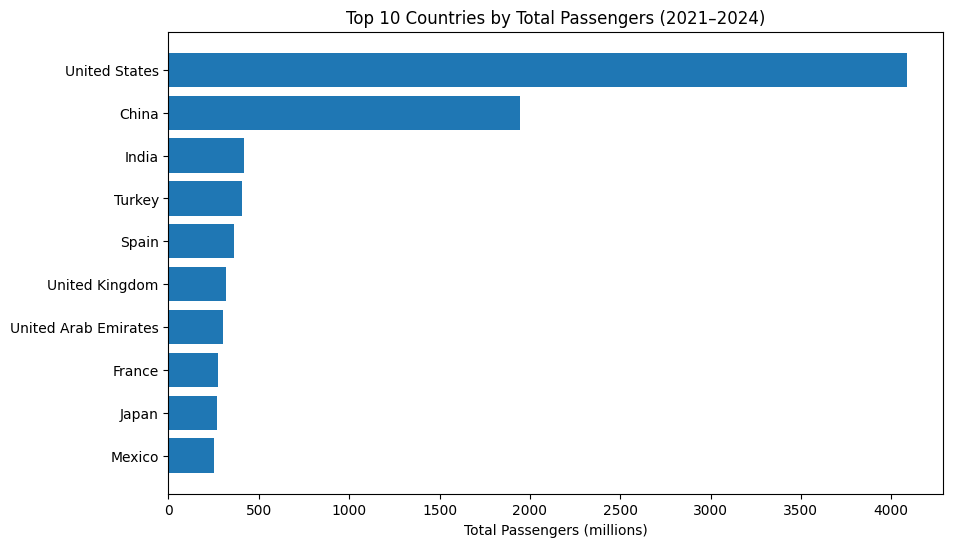

In [17]:
top_countries = (
    airports.groupby("Country", as_index=False)["TotalPassengers"]
    .sum()
    .sort_values("TotalPassengers", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
plt.barh(top_countries["Country"], top_countries["TotalPassengers"]/1e6)
plt.title("Top 10 Countries by Total Passengers (2021–2024)")
plt.xlabel("Total Passengers (millions)")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Which airports/countries have recovered best since the pandemic?

In [18]:
# Focus on the latest year (2024)
df_2024 = airports[airports["Year"] == 2024]

# Sort by percent change
top_growth = df_2024.sort_values(by="PercentChangeSigned", ascending=False)
top_growth.head(10)

# These are the airports with the highest percent growth between 2023 → 2024.

,Rank,Airport,Location,Country,Code,TotalPassengers,RankChange,Year,Percent change numeric,PercentChangeSigned
9,10.0,Shanghai Pudong International Airport,"Pudong, Shanghai",China,PVG/ZSPD,76787039.0,11.0,2024,41.0,41.0
31,32.0,Hong Kong International Airport,"Chek Lap Kok, New Territories",Hong Kong,HKG/VHHH,53100000.0,NaN,2024,34.3,34.3
15,16.0,Beijing Capital International Airport,"Chaoyang-Shunyi, Beijing",China,PEK/ZBAA,67367428.0,7.0,2024,27.4,27.4
12,13.0,Seoul Incheon International Airport,"Jung District, Incheon",South Korea,ICN/RKSI,70669246.0,7.0,2024,26.7,26.7
37,38.0,Beijing Daxing International Airport,"Daxing District, Beijing",China,PKX/ZBAD,49441029.0,14.0,2024,25.5,25.5
28,29.0,Chengdu Tianfu International Airport,"Jianyang, Chengdu, Sichuan",China,TFU/ZUTF,54905784.0,10.0,2024,22.6,22.6
38,39.0,Leonardo da Vinci Rome Fiumicino Airport,"Fiumicino, Metropolitan City of Rome, Lazio",Italy,FCO/LIRF,49203734.0,NaN,2024,21.4,21.4
11,12.0,Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,76364767.0,NaN,2024,20.9,20.9
25,26.0,Kuala Lumpur International Airport,"Sepang, Selangor",Malaysia,KUL/WMKK,57044869.0,9.0,2024,20.7,20.7
34,35.0,Phoenix Sky Harbor International Airport,"Phoenix, Arizona",United States,PHX/KPHX,52325266.0,2.0,2024,17.9,17.9


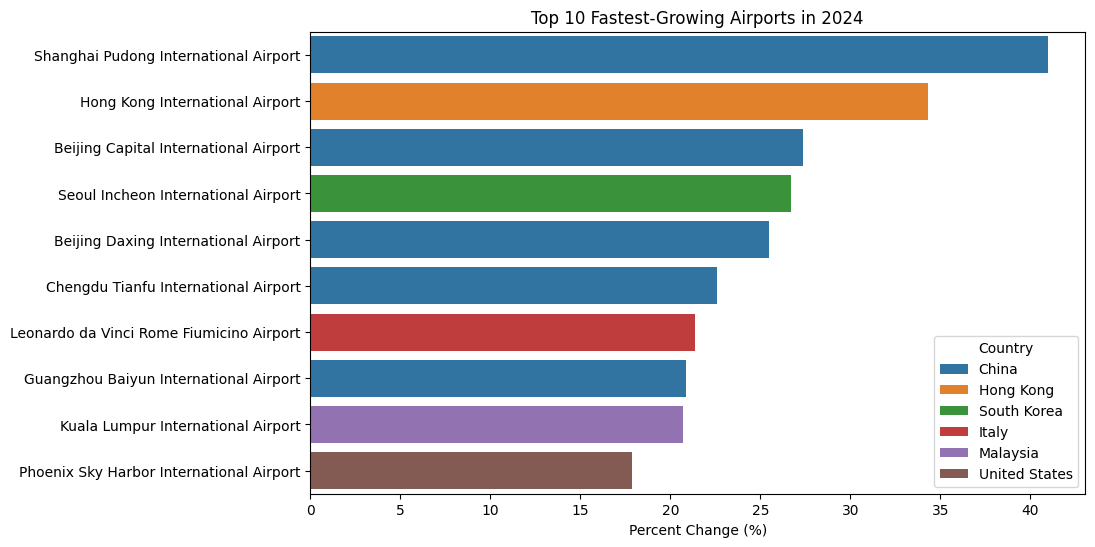

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_growth.head(10),
    y="Airport",
    x="Percent change numeric",
    hue="Country",
    dodge=False
)
plt.title("Top 10 Fastest-Growing Airports in 2024")
plt.xlabel("Percent Change (%)")
plt.ylabel("")
plt.show()

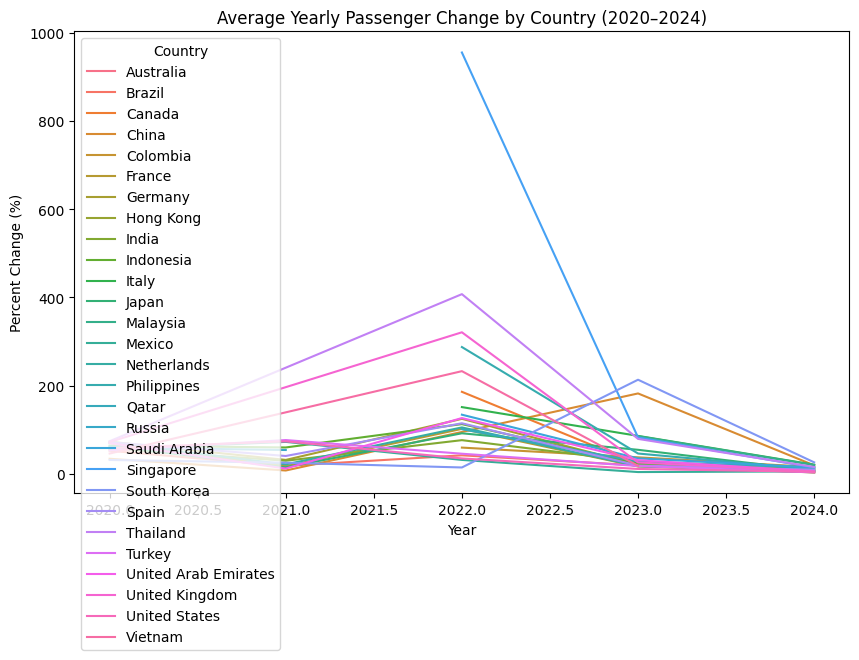

In [20]:
# plot percent change over time 
country_trend = (
    airports.groupby(["Country", "Year"])["Percent change numeric"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(data=country_trend, x="Year", y="Percent change numeric", hue="Country")
plt.title("Average Yearly Passenger Change by Country (2020–2024)")
plt.ylabel("Percent Change (%)")
plt.show()


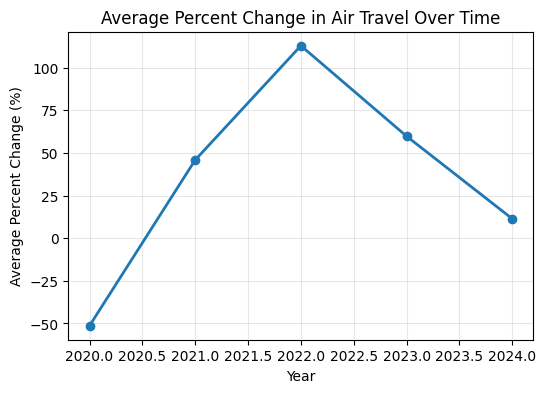

In [ ]:
# look at average percent change each year. makes sense its so low during covid, then jumps up and goes back down...

avg_change = (
    airports.groupby("Year")["PercentChangeSigned"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,4))
plt.plot(avg_change["Year"], avg_change["PercentChangeSigned"], marker='o', linewidth=2)
plt.title("Average Percent Change in Air Travel Over Time")
plt.xlabel("Year")
plt.ylabel("Average Percent Change (%)")
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
airports.groupby("Year")["PercentChangeSigned"].agg(["mean", "median", "min", "max"]).round(1)


,mean,median,min,max
Year,,,,
2020,-51.3,-55.2,-74.5,-22.0
2021,45.9,56.0,-15.4,125.8
2022,112.8,73.6,10.3,954.8
2023,59.8,21.4,3.3,316.2
2024,11.4,9.4,-6.2,41.0


In [23]:
# Airports with the largest passenger drops in 2020
biggest_drops = (
    airports[airports["Year"] == 2020]
    .sort_values("PercentChangeSigned")
    .head(10)
)

biggest_drops[["Airport", "Country", "PercentChangeSigned"]]

,Airport,Country,PercentChangeSigned
243,Suvarnabhumi Airport,Thailand,-74.5
236,Frankfurt Airport,Germany,-73.4
244,John F. Kennedy International Airport,United States,-73.4
222,Heathrow Airport,United Kingdom,-72.7
240,Madrid Barajas Airport,Spain,-72.3
249,San Francisco International Airport,United States,-71.4
229,Amsterdam Airport Schiphol,Netherlands,-70.9
220,Charles de Gaulle Airport,France,-70.8
218,Dubai International Airport,United Arab Emirates,-70.1
214,Los Angeles International Airport,United States,-67.3


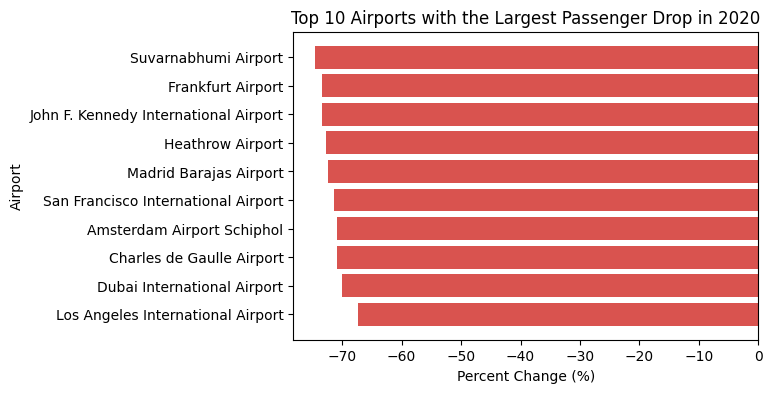

In [24]:
plt.figure(figsize=(6,4))
plt.barh(biggest_drops["Airport"], biggest_drops["PercentChangeSigned"], color="#d9534f")
plt.title("Top 10 Airports with the Largest Passenger Drop in 2020")
plt.xlabel("Percent Change (%)")
plt.ylabel("Airport")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# look at 2022
biggest_recovery = (
    airports[airports["Year"] == 2022]
    .sort_values("PercentChangeSigned", ascending=False)
    .head(10)
)

biggest_recovery[["Airport", "Country", "PercentChangeSigned"]]

,Airport,Country,PercentChangeSigned
135,Singapore Changi Airport,Singapore,954.8
134,London Gatwick Airport,United Kingdom,424.7
149,Suvarnabhumi Airport,Thailand,407.6
143,Ninoy Aquino International Airport,Philippines,287.8
147,Sydney Kingsford Smith Airport,Australia,265.8
133,Tan Son Nhat International Airport,Vietnam,233.2
107,Heathrow Airport,United Kingdom,217.7
128,Toronto Pearson International Airport,Canada,186.4
138,Munich Airport,Germany,153.2
145,"Rome–Fiumicino International Airport ""Leonardo...",Italy,151.8


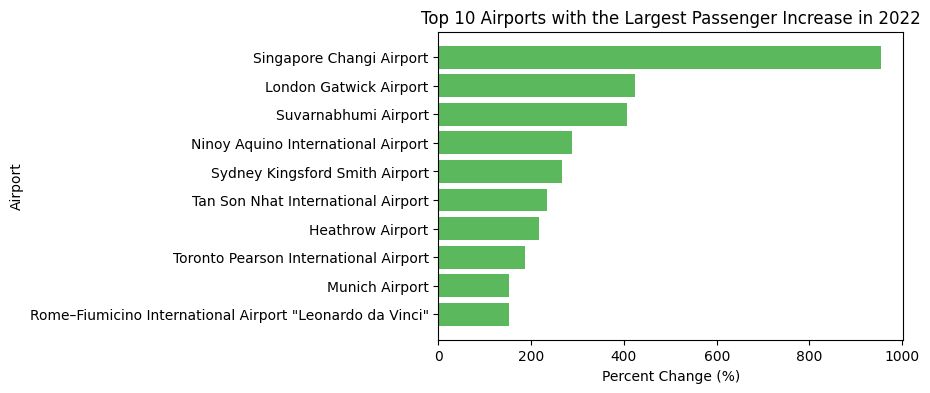

In [26]:

plt.figure(figsize=(6,4))
plt.barh(biggest_recovery["Airport"], biggest_recovery["PercentChangeSigned"], color="#5cb85c")
plt.title("Top 10 Airports with the Largest Passenger Increase in 2022")
plt.xlabel("Percent Change (%)")
plt.ylabel("Airport")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# i think 2021 might be more interesting because it is the year after covid 
# looks like the US recovered the quickest right after covid, then in 2022 it was more asia
biggest_recovery_2021 = (
    airports[airports["Year"] == 2021]
    .sort_values("PercentChangeSigned", ascending=False)
    .head(10)
)

biggest_recovery_2021[["Airport", "Country", "PercentChangeSigned"]]

,Airport,Country,PercentChangeSigned
198,Antalya Airport,Turkey,125.8
161,Miami International Airport,United States,99.9
156,Orlando International Airport,United States,86.7
175,John F. Kennedy International Airport,United States,85.1
178,Newark Liberty International Airport,United States,82.8
196,Cancún International Airport,Mexico,82.1
165,Seattle–Tacoma International Airport,United States,80.4
194,Logan International Airport,United States,79.6
159,Harry Reid International Airport,United States,78.6
197,Salt Lake City International Airport,United States,78.2


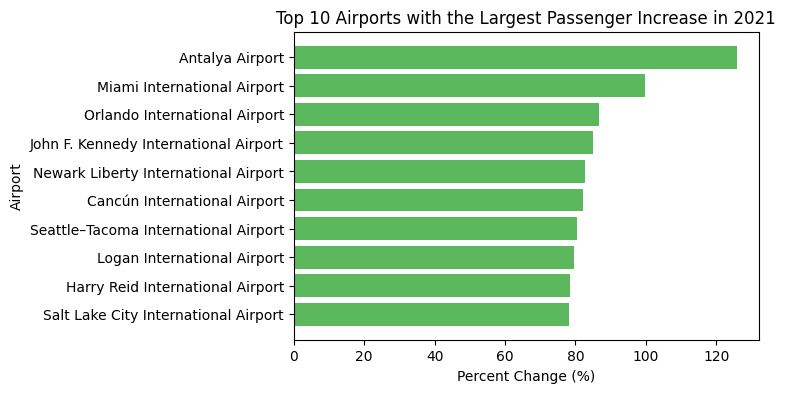

In [ ]:
# plot
plt.figure(figsize=(6,4))
plt.barh(biggest_recovery_2021["Airport"], biggest_recovery_2021["PercentChangeSigned"], color="#5cb85c")
plt.title("Top 10 Airports with the Largest Passenger Increase in 2021")
plt.xlabel("Percent Change (%)")
plt.ylabel("Airport")
plt.gca().invert_yaxis()
plt.show()